In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import copy

import json

In [2]:
with open ('data/datasets.txt', "r") as json_file:
    datasets = json.loads(json_file.read())

In [3]:
data = datasets['data_20']
n_samples = data['n_samples']
clusters = data['clusters']
cluster_std = data['cluster_std']
X = np.array(data['dataset'])

In [4]:
from utils import def_dataset
n_samples = 90
clusters = 5
cluster_std = 2
X = def_dataset(n_samples,clusters,cluster_std)

In [5]:
clusters = 3

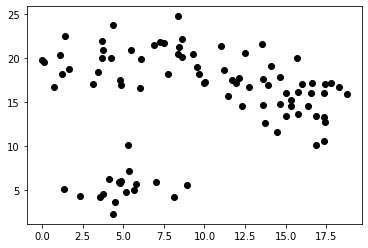

In [6]:
plt.plot(X[:,0],X[:,1], 'ok')
plt.show()

# Fuzzy C-means Equi-balanced

In [7]:
from fuzzy import fuzzy_capacity_constraints, centroides

In [8]:
Z = np.ones((n_samples,))

In [9]:
LABELS, U = fuzzy_capacity_constraints(X,Z,clusters,1)

In [10]:
P = centroides(X, U, 2)

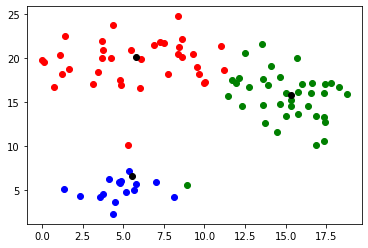

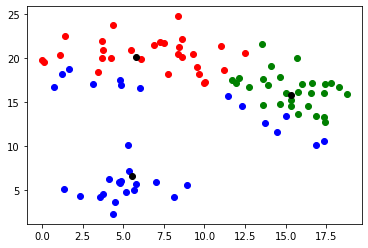

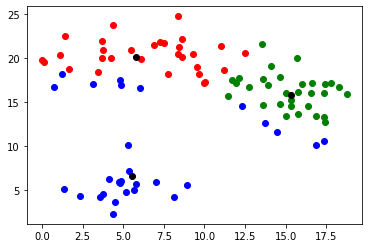

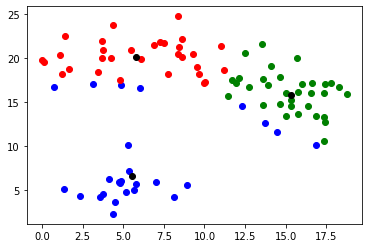

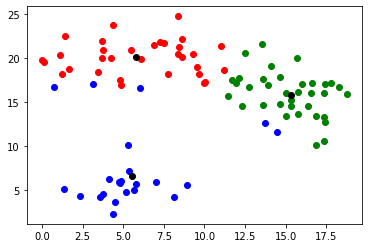

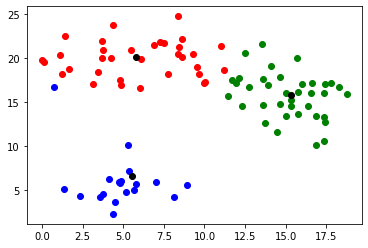

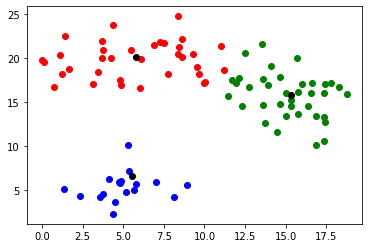

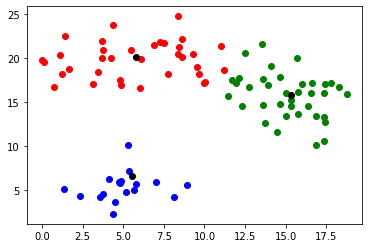

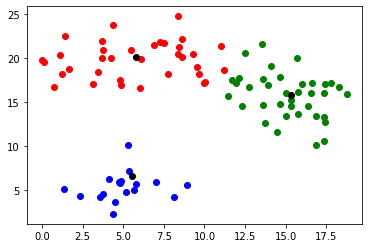

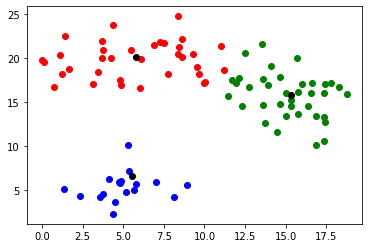

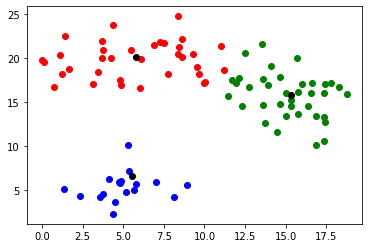

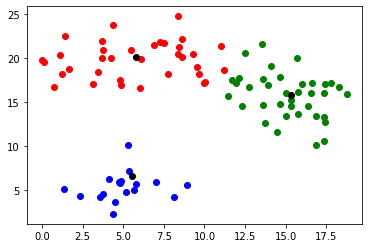

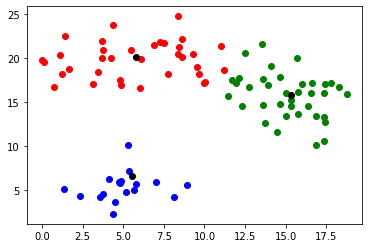

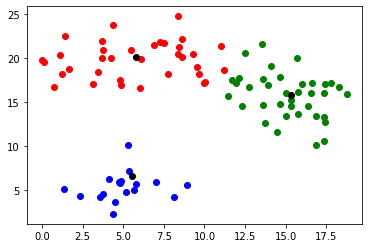

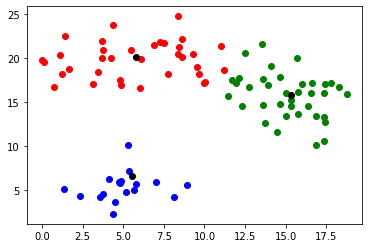

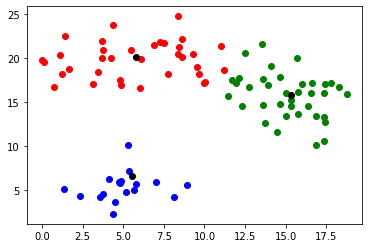

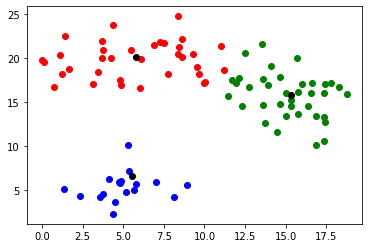

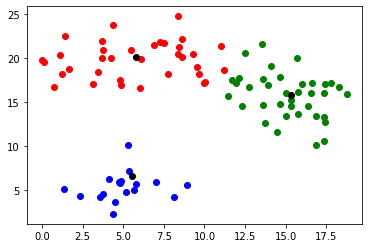

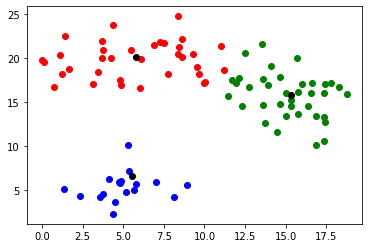

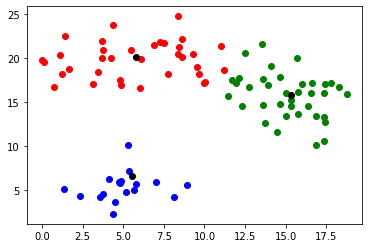

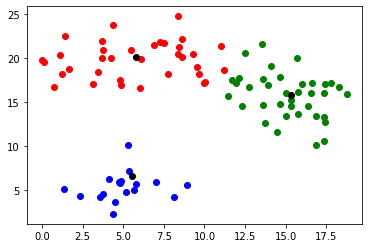

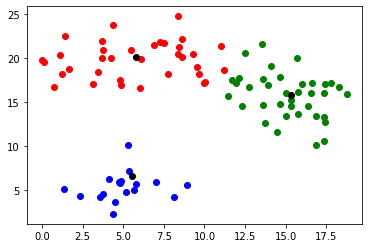

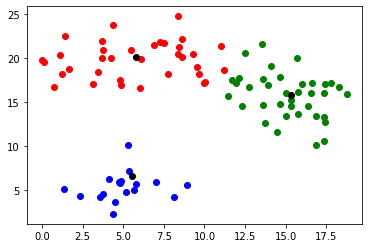

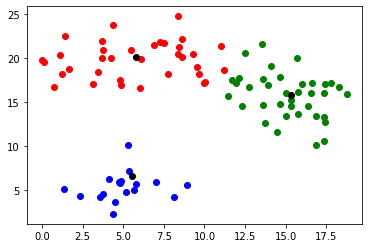

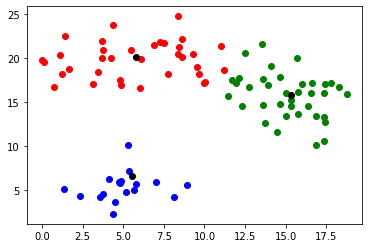

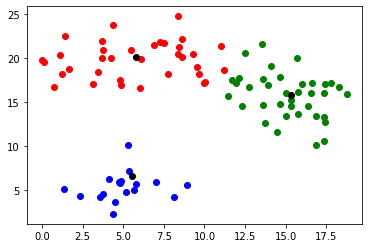

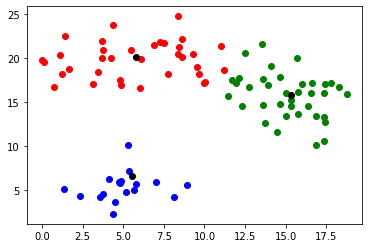

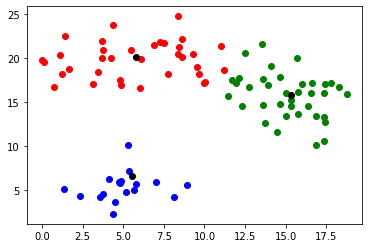

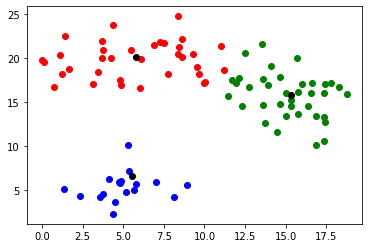

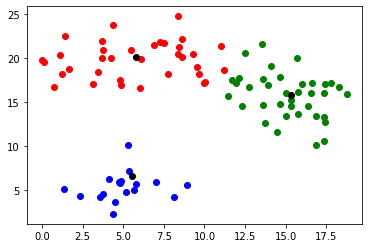

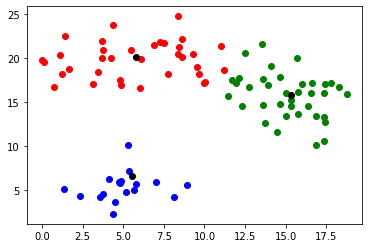

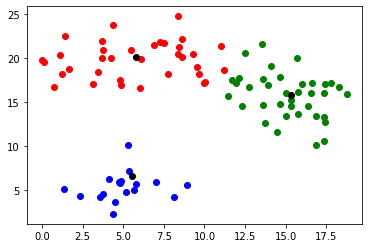

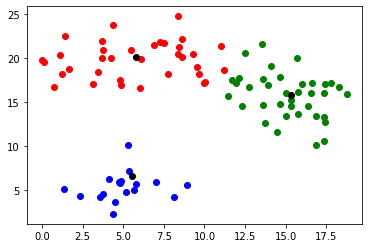

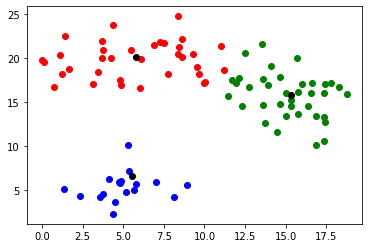

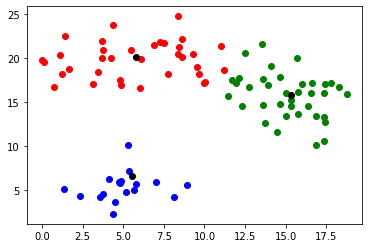

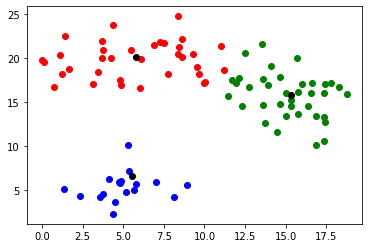

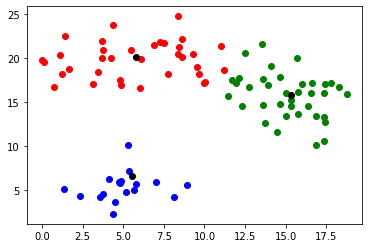

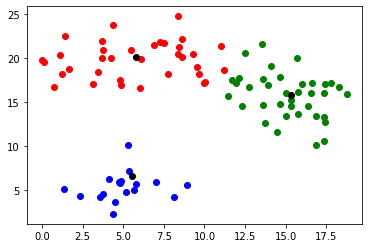

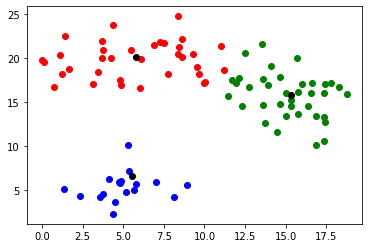

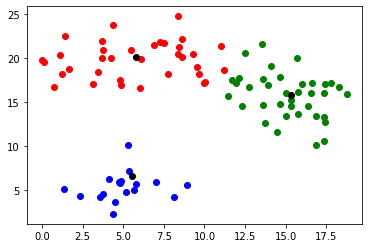

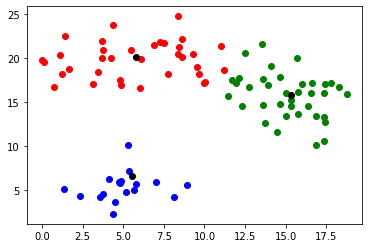

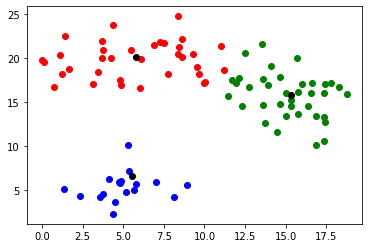

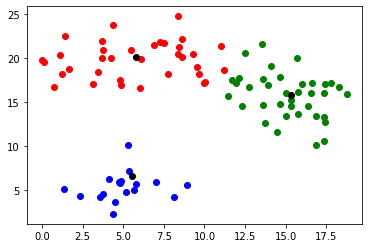

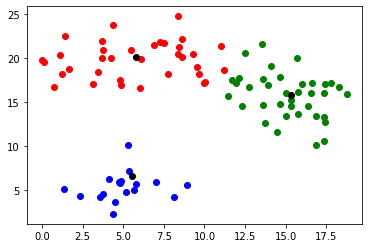

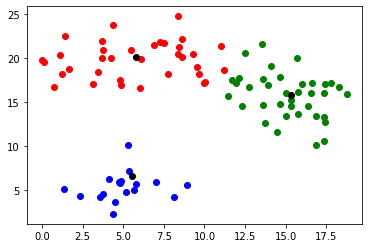

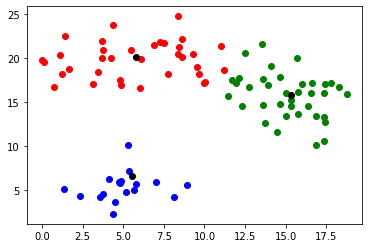

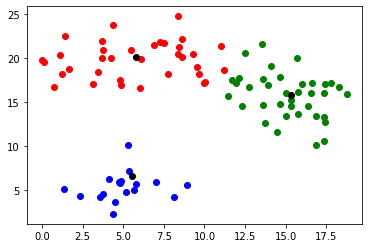

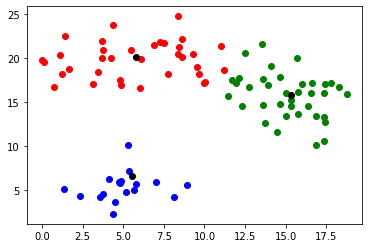

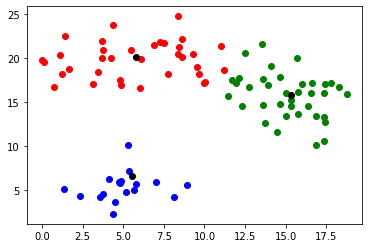

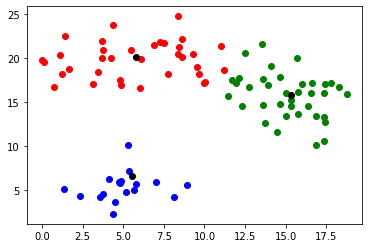

In [11]:
for labels in LABELS: 
    for c in range(clusters):
        color = ['b','r','g','y'][c]
        X0 = X[[labels[i] == c for i in range(len(labels))]]
        plt.plot(X0[:,0], X0[:,1], color+'o')
    for centroide in P:
        plt.plot(centroide[0],centroide[1], 'ko')
    plt.show()

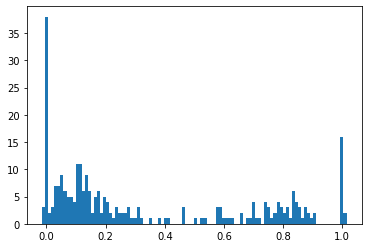

In [12]:
plt.hist(U.reshape(n_samples*clusters), bins=100)
plt.show()

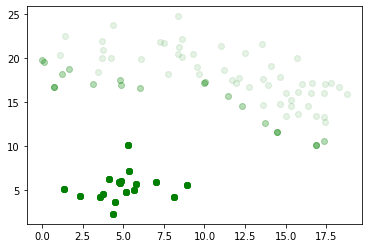

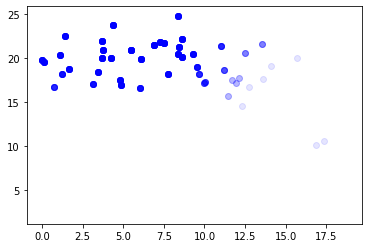

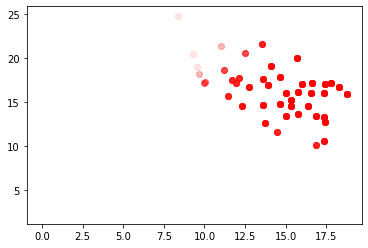

In [13]:
for label in range(3):

    pertencimento_max = U[label]
    color = ['g','b','r'][label]

    labels = np.ones(len(U[label]))*label #LABELS[-1] 

    for i in range(10):
        if i == 0:
            indexes = (np.array(pertencimento_max) < (i+1)/10)
        elif i == 9:
            indexes = (i/10 <= np.array(pertencimento_max)) & (np.array(pertencimento_max) < (i+1)/10)
        else:
            indexes = (i/10 <= np.array(pertencimento_max))
        X_p = X[indexes]
        labels_p = list(np.array(labels)[indexes])
        plt.plot(X_p[:,0], X_p[:,1], color+'o', alpha=i/10)
    plt.show()

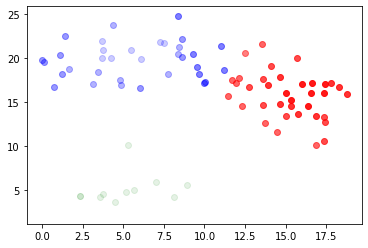

In [14]:
labels = LABELS[-1] 

for i in range(10):
    indexes = (np.quantile(pertencimento_max, i/10) <= pertencimento_max) & (pertencimento_max < np.quantile(pertencimento_max, (i+1)/10)) 
    X_p = X[indexes]
    labels_p = list(np.array(labels)[indexes])
    for c in range(clusters):
        color = ['g','b','r'][c]
        X0 = X_p[[labels_p[i] == c for i in range(len(labels_p))]]
        plt.plot(X0[:,0], X0[:,1], color+'o', alpha=i/10)
plt.show()